<a href="https://colab.research.google.com/github/lionessaura/Web-scraping-word-cloud/blob/main/esports_word_cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install lxml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import bs4 as bs
import urllib.request

In [ ]:
sauce = urllib.request.urlopen('https://esportsresearch.net/literature/items').read()

In [ ]:
#download html page
url = "https://esportsresearch.net/literature/items?page={}"
for i in range(1,16):
  url_new = url.format(i)
  data = requests.get(url_new)
  with open("sample_data/{}.html".format(i), "w+") as f:
    f.write(data.text)

In [ ]:
r = requests.get(url)
soup = bs.BeautifulSoup(r.text, 'html.parser')

In [ ]:
# get titles of all papers
for k in range(1, 16):
  with open("sample_data/1.html") as f:

    page = f.read()
    soup = BeautifulSoup(page, 'lxml')
  titles = soup.find_all(class_ = 'permalink')
  for i in titles:
    print(i.text)

Influence of service performance variables and brand variables on the loyalty of esports event users
Esports Governance: An Analysis of Rule Enforcement in
League of Legends
Improving the Health of Emerging Adult Gamers—A Scoping Review of Influences
Policy Recommendation on Esports for the European Parliament
Background Analysis on Esports for the European Parliament
(E-) Sport im rechtlichen Sinne und privatrechtliche Beziehungen zwischen Clan und E-Sportler
The current situation of the French professional
esports industry: economic models of the clubs
and regulation of the leagues
The Relationship Between Basic Needs Satisfaction, Self-determined Motivation, and Burnout in Korean Esports Players
Esports: an exploration of the advancing esports
landscape, actors and interorganisational
relationships
Percepción de la marca en esports: evento grande y pequeño
Obesity and individual performance: the case of eSports
Esports associations and the pursuit of legitimacy: evidence from German

In [ ]:
#get tags of all papers
tag_list = [ ]
for k in range(1, 16):
  with open("sample_data/1.html") as f:
    page = f.read()
    soup = BeautifulSoup(page, 'lxml')
  tags = soup.find_all(class_ = 'tags')
  for i in tags:
    tag_list.append(i.text.replace("Tags:", ""))
tag_list

['\nbrand management, esports, esports events, loyalty, video games\n',
 '\nCompetitive Rulings, esports, Esports Governance, League of Legends\n',
 '\ndiet, esports, gaming, nutrition, Online Games, social marketing, video games, Young adults\n',
 '\nesports, EU, Europe, European Parliament, European Union, Regulatory\n',
 '\nesports, EU, Europe, European Parliament, European Union, Regulatory\n',
 '\nContent Creation, Contract, Contract Drafting, Contract Duration, Employee, Employer, Employment, Employment Law, International Private Law, Labor Law, Law, Youth Protection\n',
 '\neconomic models, esports, leagues’ regulation, professional esports clubs, utility maximization\n',
 '\nAthlete burnout, Esports players, Esports players’ motivation, Online Games, self-determination theory\n',
 '\necosystem, esports, eSports industry, interorganisational relations theory, value chain\n',
 '\nEsport, individual performance, obesity\n',
 '\nconformance, electronic gaming, institutional theory,

In [ ]:
# get the data and use beatiful soup 
#for x in range(1,16):
title_array = []
tag_array = []
dic = {}
for html in range(1,16):
    with open("sample_data/{}.html".format(html),encoding="utf-8") as f:
        page = f.read()
        soup = BeautifulSoup(page, 'html.parser')
        records = soup.find_all("div", class_="item record")
        for record in records:
            title = record.a.text
            title_array.append(title)
            try:
                tags = record.find(class_="tags")
                tag = tags.text.replace("Tags:", "").replace("\n", "")
                tag_array.append(tag)
                dic[title]=tag
            except:
                tag_array.append(None)
print(dic)

{'Influence of service performance variables and brand variables on the loyalty of esports event users': 'brand management, esports, esports events, loyalty, video games', 'Esports Governance: An Analysis of Rule Enforcement in\nLeague of Legends': 'Competitive Rulings, esports, Esports Governance, League of Legends', 'Improving the Health of Emerging Adult Gamers—A Scoping Review of Influences': 'diet, esports, gaming, nutrition, Online Games, social marketing, video games, Young adults', 'Policy Recommendation on Esports for the European Parliament': 'esports, EU, Europe, European Parliament, European Union, Regulatory', 'Background Analysis on Esports for the European Parliament': 'esports, EU, Europe, European Parliament, European Union, Regulatory', '(E-) Sport im rechtlichen Sinne und privatrechtliche Beziehungen zwischen Clan und E-Sportler': 'Content Creation, Contract, Contract Drafting, Contract Duration, Employee, Employer, Employment, Employment Law, International Private L

In [ ]:
dic

{'Influence of service performance variables and brand variables on the loyalty of esports event users': 'brand management, esports, esports events, loyalty, video games',
 'Esports Governance: An Analysis of Rule Enforcement in\nLeague of Legends': 'Competitive Rulings, esports, Esports Governance, League of Legends',
 'Improving the Health of Emerging Adult Gamers—A Scoping Review of Influences': 'diet, esports, gaming, nutrition, Online Games, social marketing, video games, Young adults',
 'Policy Recommendation on Esports for the European Parliament': 'esports, EU, Europe, European Parliament, European Union, Regulatory',
 'Background Analysis on Esports for the European Parliament': 'esports, EU, Europe, European Parliament, European Union, Regulatory',
 '(E-) Sport im rechtlichen Sinne und privatrechtliche Beziehungen zwischen Clan und E-Sportler': 'Content Creation, Contract, Contract Drafting, Contract Duration, Employee, Employer, Employment, Employment Law, International Priv

In [ ]:
tag_array

['brand management, esports, esports events, loyalty, video games',
 'Competitive Rulings, esports, Esports Governance, League of Legends',
 'diet, esports, gaming, nutrition, Online Games, social marketing, video games, Young adults',
 'esports, EU, Europe, European Parliament, European Union, Regulatory',
 'esports, EU, Europe, European Parliament, European Union, Regulatory',
 'Content Creation, Contract, Contract Drafting, Contract Duration, Employee, Employer, Employment, Employment Law, International Private Law, Labor Law, Law, Youth Protection',
 'economic models, esports, leagues’ regulation, professional esports clubs, utility maximization',
 'Athlete burnout, Esports players, Esports players’ motivation, Online Games, self-determination theory',
 'ecosystem, esports, eSports industry, interorganisational relations theory, value chain',
 None,
 'Esport, individual performance, obesity',
 'conformance, electronic gaming, institutional theory, manipulation, partial legitimacy, 

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(title_array, columns=['Title'])
df['Tag'] = pd.DataFrame(tag_array)
df

,Title,Tag
0,Influence of service performance variables and...,"brand management, esports, esports events, loy..."
1,Esports Governance: An Analysis of Rule Enforc...,"Competitive Rulings, esports, Esports Governan..."
2,Improving the Health of Emerging Adult Gamers—...,"diet, esports, gaming, nutrition, Online Games..."
3,Policy Recommendation on Esports for the Europ...,"esports, EU, Europe, European Parliament, Euro..."
4,Background Analysis on Esports for the Europea...,"esports, EU, Europe, European Parliament, Euro..."
...,...,...
1455,The Legal Status of Video Games: Comparative A...,"legal, national analysis"
1456,Esports Consumer Perspectives on Match-Fixing:...,"cheating, Gambling, game integrity, gaming, ma..."
1457,Institutionalisation in E-Sports,"governance, institutionalisation, stability, v..."
1458,E-Sport and the EU: The View from the English ...,"elements of sport, physical element, social fu..."


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

(-0.5, 1599.5, 799.5, -0.5)

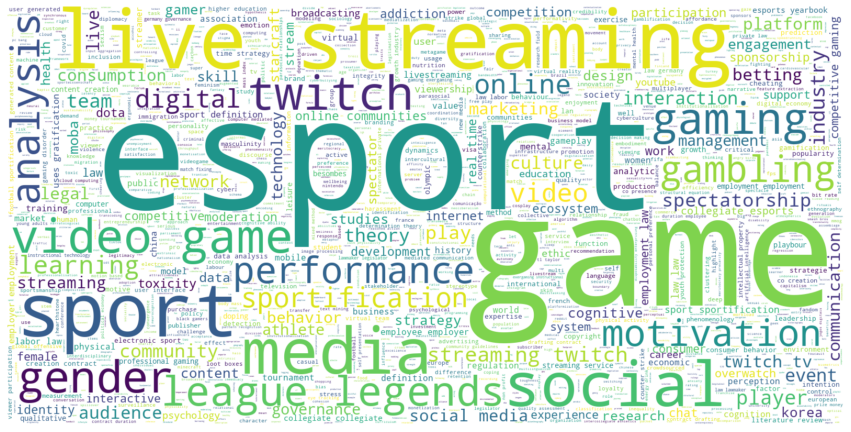

In [ ]:
df["Tag"] = df["Tag"].fillna(value="")
word_string=" ".join(df['Tag'].str.lower())
plt.figure(figsize=(15,15))
wc = WordCloud(background_color="white", stopwords = STOPWORDS, max_words=2000, max_font_size= 300,  width=1600, height=800)
wc.generate(word_string)

plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), interpolation="bilinear")
plt.axis('off')



